## Ana CNN

In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

In [20]:
ipath  = os.environ['LPRDATADIR']+'cnn/'

type     = 'levels' 
pressure = '5bar'
sbins    = '16x16'
names    = ['esum', 'emax', 'esimple', 'e', 'ez']


In [21]:
def roc(type, pressure, sbins, name):
    ydir, ypdir  = {}, {}
    plt.figure()
    for name in names:
        ifile = ipath + cnn.cnn_filename(type, pressure, sbins, name)+'.npz'
        cnndata = np.load(ifile)
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
        plt.plot(yr, ys, label = name)
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    plt.title(pressure+' '+sbins);
    plt.savefig('roc_'+pressure+'_'+type+'_'+sbins+'.png')


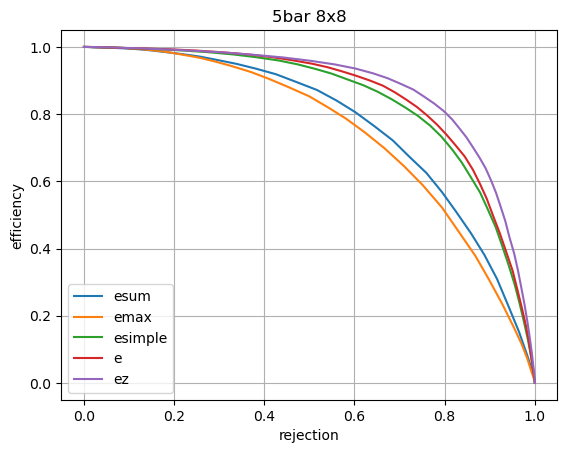

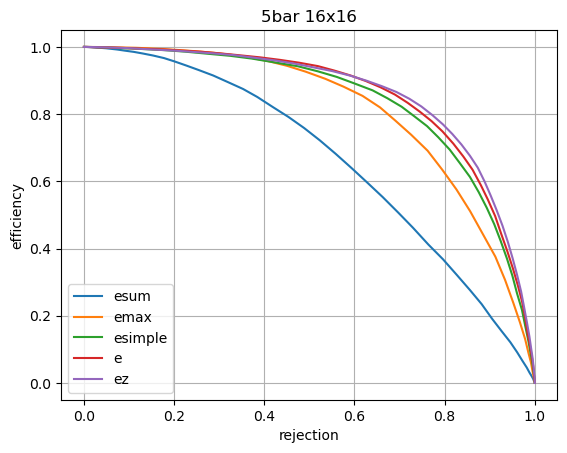

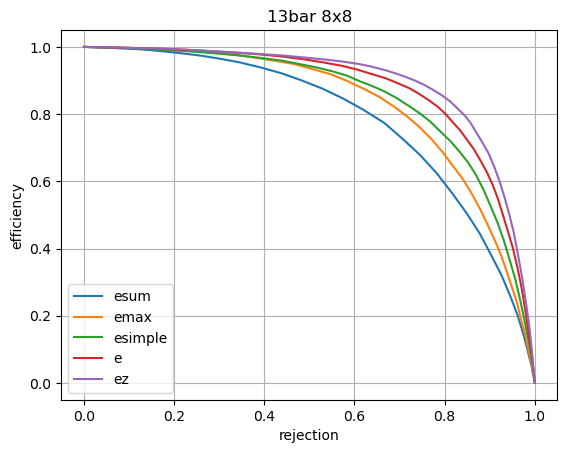

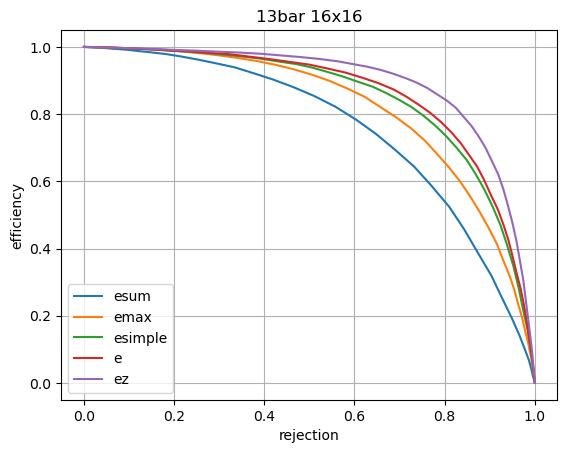

In [22]:
for pressure in ['5bar', '13bar']:
    for sbins in ['8x8', '16x16']:
        roc(type,pressure, sbins, names)


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/next/data/NEXT100/pressure_topology/cnn/cnn_roc_levels_2bar_32x32_ez.npz'

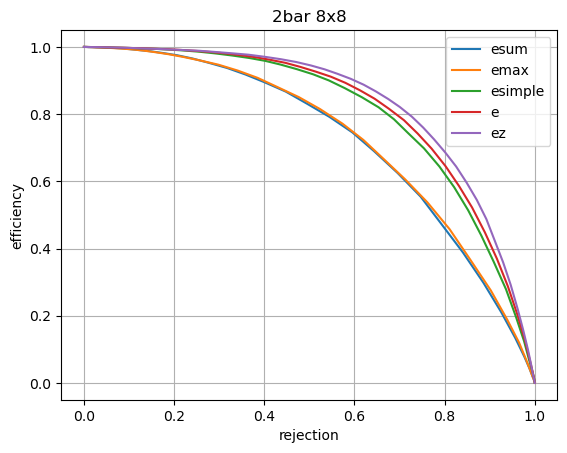

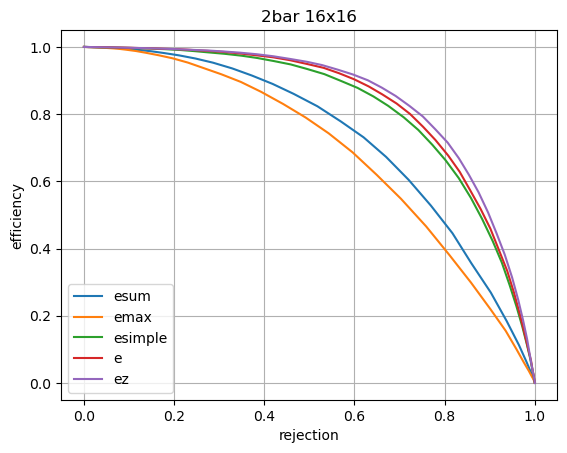

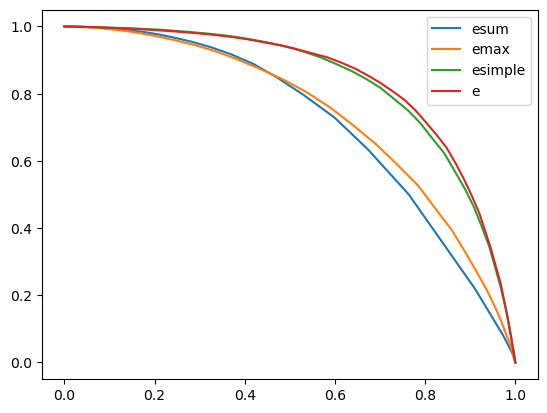

In [23]:
for pressure in ['2bar', '1bar']:
    for sbins in ['8x8', '16x16', '32x32']:
        roc(type,pressure, sbins, names)

## Projections

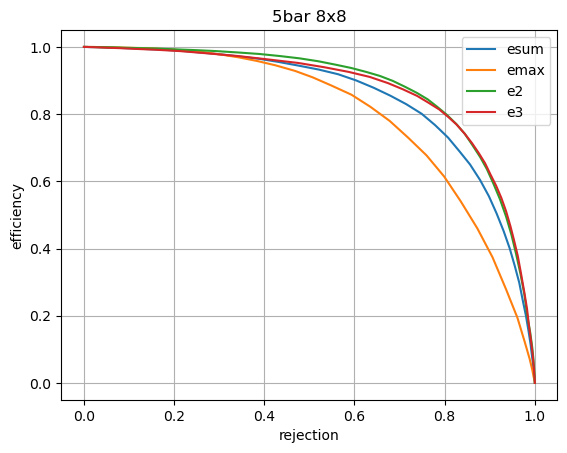

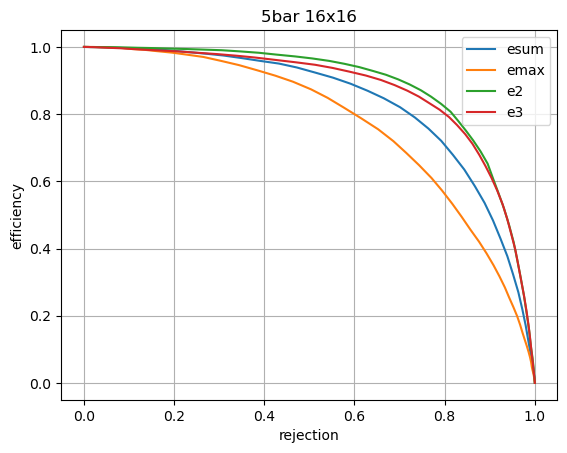

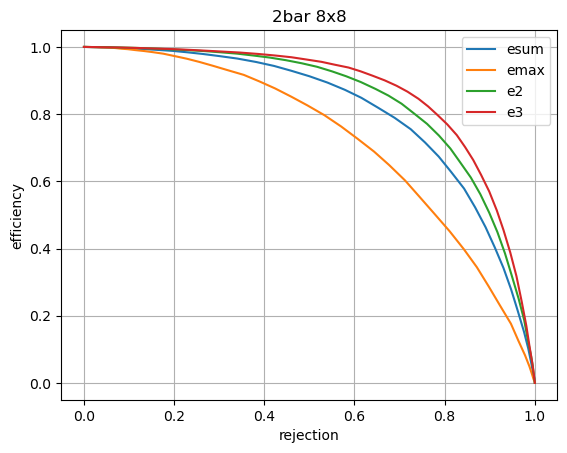

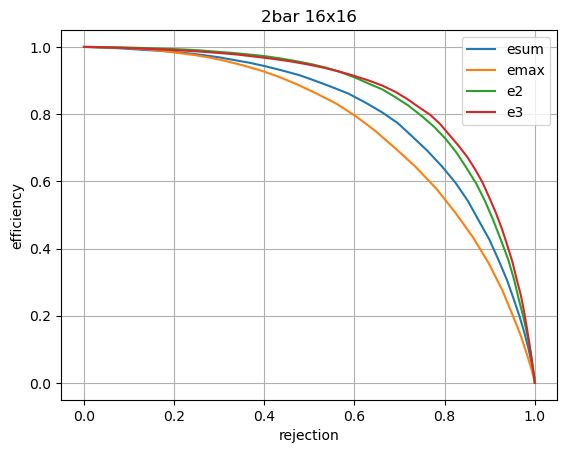

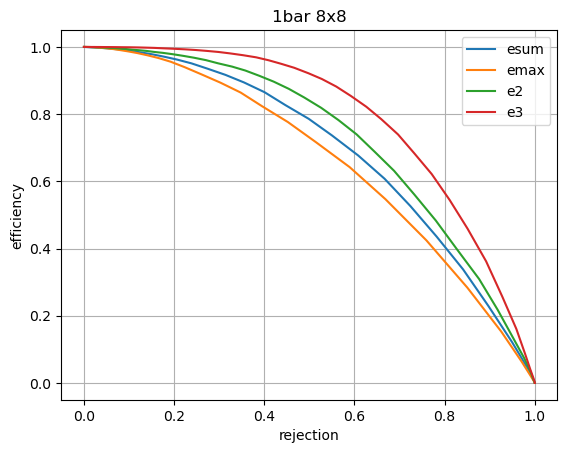

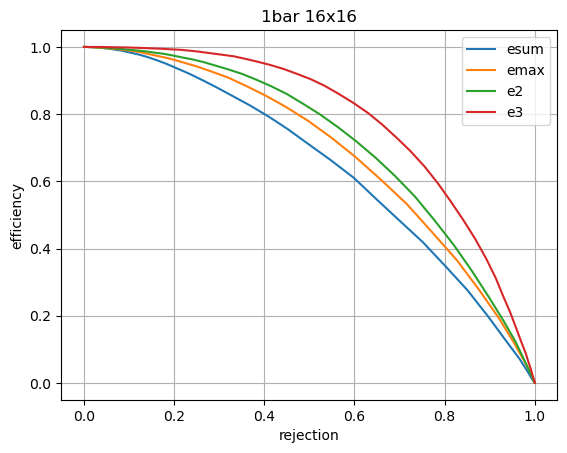

In [26]:
type  = 'projections'
names = ['esum', 'emax', 'e2', 'e3']
for pressure in ['5bar', '2bar', '1bar']:
    for sbins in ['8x8', '16x16']:
        roc(type,pressure, sbins, names)